In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('data/ratings.csv')

Ratings data analysis

In [3]:
print(ratings.head())
print(ratings.info())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [4]:
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [5]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [6]:
ratings.shape

(100836, 4)

In [7]:
min_user_ratings = 5
min_movie_ratings = 5

user_counts = ratings['userId'].value_counts()
movie_counts = ratings['movieId'].value_counts()

ratings = ratings[ratings['userId'].isin(user_counts[user_counts >= min_user_ratings].index)]
ratings = ratings[ratings['movieId'].isin(movie_counts[movie_counts >= min_movie_ratings].index)]

In [9]:
ratings.shape

(90274, 4)

In [10]:
ratings['rating_normalized'] = (ratings['rating'] - ratings['rating'].mean())/(ratings['rating'].std())

In [11]:
ratings.head()

,userId,movieId,rating,timestamp,rating_normalized
0,1,1,4.0,2000-07-30 18:45:03,0.449228
1,1,3,4.0,2000-07-30 18:20:47,0.449228
2,1,6,4.0,2000-07-30 18:37:04,0.449228
3,1,47,5.0,2000-07-30 19:03:35,1.420236
4,1,50,5.0,2000-07-30 18:48:51,1.420236


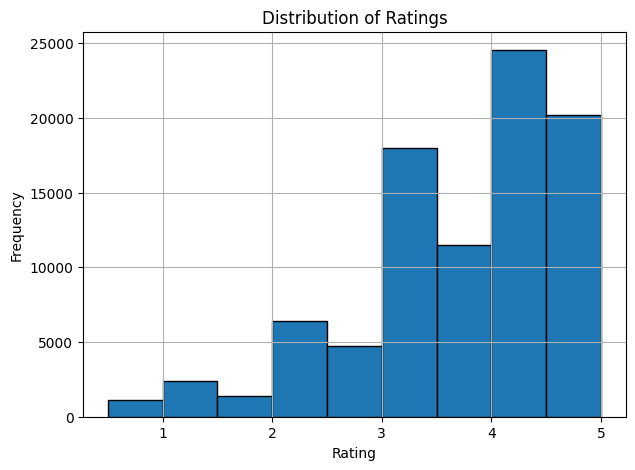

In [12]:
plt.figure(figsize=(7, 5))
ratings['rating'].hist(bins=9, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

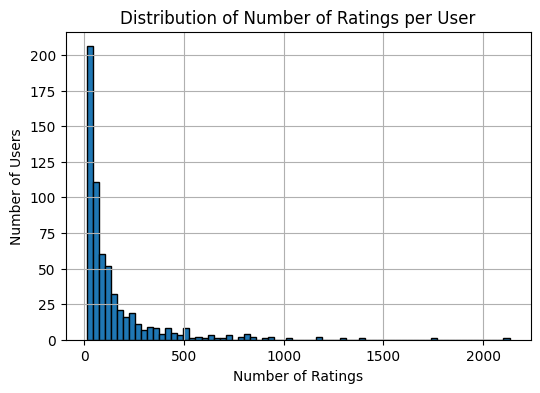

In [13]:
ratings_per_user = ratings.groupby('userId')['rating'].count()

plt.figure(figsize=(6, 4))
ratings_per_user.hist(bins=70, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

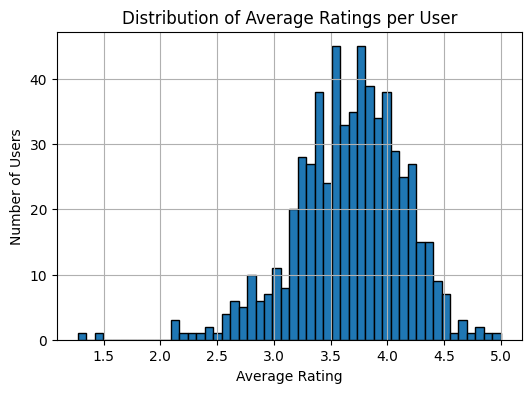

In [14]:
average_rating_per_user = ratings.groupby('userId')['rating'].mean()

plt.figure(figsize=(6, 4))
average_rating_per_user.hist(bins=50, edgecolor='black')
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

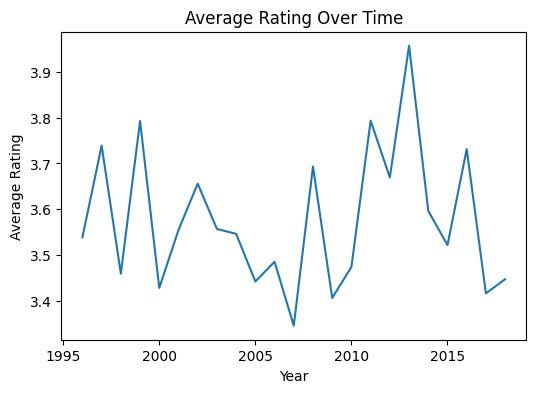

In [15]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

average_rating_per_year = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(6, 4))
average_rating_per_year.plot()
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

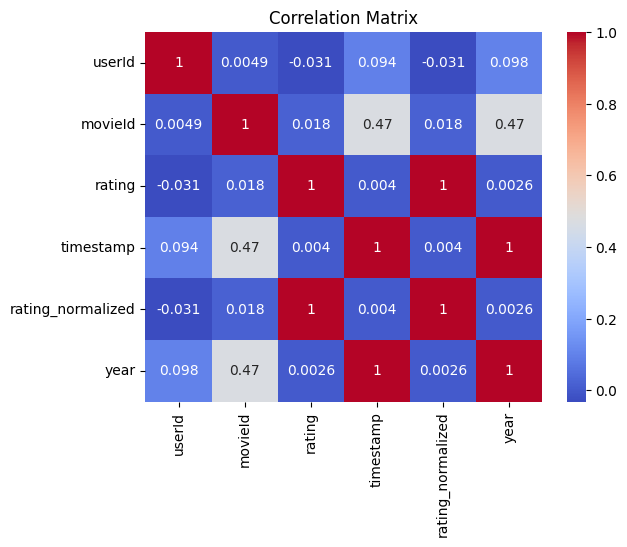

In [16]:
correlation_matrix = ratings.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
ratings.head()

,userId,movieId,rating,timestamp,rating_normalized,year
0,1,1,4.0,2000-07-30 18:45:03,0.449228,2000
1,1,3,4.0,2000-07-30 18:20:47,0.449228,2000
2,1,6,4.0,2000-07-30 18:37:04,0.449228,2000
3,1,47,5.0,2000-07-30 19:03:35,1.420236,2000
4,1,50,5.0,2000-07-30 18:48:51,1.420236,2000


In [19]:
ratings.to_csv('cleaned_ratings.csv', index=False)

Movie dataset analysis

In [20]:
movies = pd.read_csv('data/movies.csv')

In [21]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
print(movies.head())
print(movies.info())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [23]:
movies['genres'] = movies['genres'].str.split('|')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [24]:
movies = movies.join(movies['genres'].str.join('|').str.get_dummies())
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995.0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995.0


In [26]:
print(movies.isnull().sum())

movieId                0
title                  0
genres                 0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64


In [27]:
movies = movies.dropna(subset=['year'])

In [28]:
movies.shape

(9729, 24)

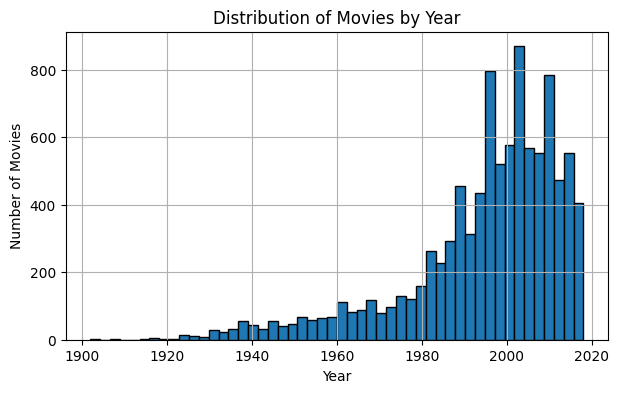

In [29]:
plt.figure(figsize=(7, 4))
movies['year'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [30]:
movies_genres = pd.read_csv('data/movies.csv')

genre_dummies = movies_genres['genres'].str.get_dummies('|')

genre_counts = genre_dummies.sum().sort_values(ascending=False)

threshold = 0.02

genre_counts_other = genre_counts[genre_counts / genre_counts.sum() < threshold]
genre_counts_main = genre_counts[genre_counts / genre_counts.sum() >= threshold]

genre_counts_main['Other'] = genre_counts_other.sum()

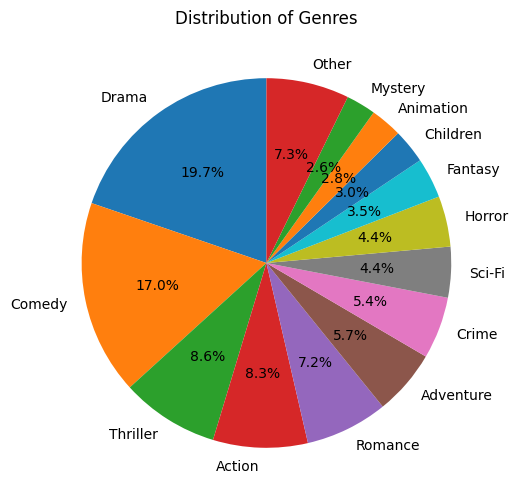

In [31]:
plt.figure(figsize=(10, 6))
genre_counts_main.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genres')
plt.ylabel('')
plt.show()

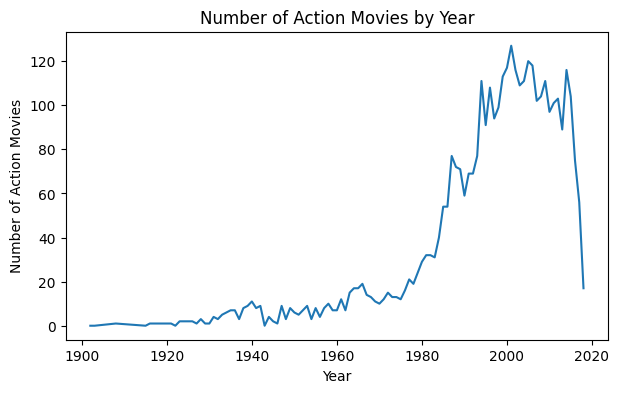

In [32]:
movies['Action'] = movies['Action'].astype(int)

action_movies_per_year = movies.groupby('year')['Comedy'].sum()

plt.figure(figsize=(7, 4))
action_movies_per_year.plot()
plt.title('Number of Action Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Action Movies')
plt.show()

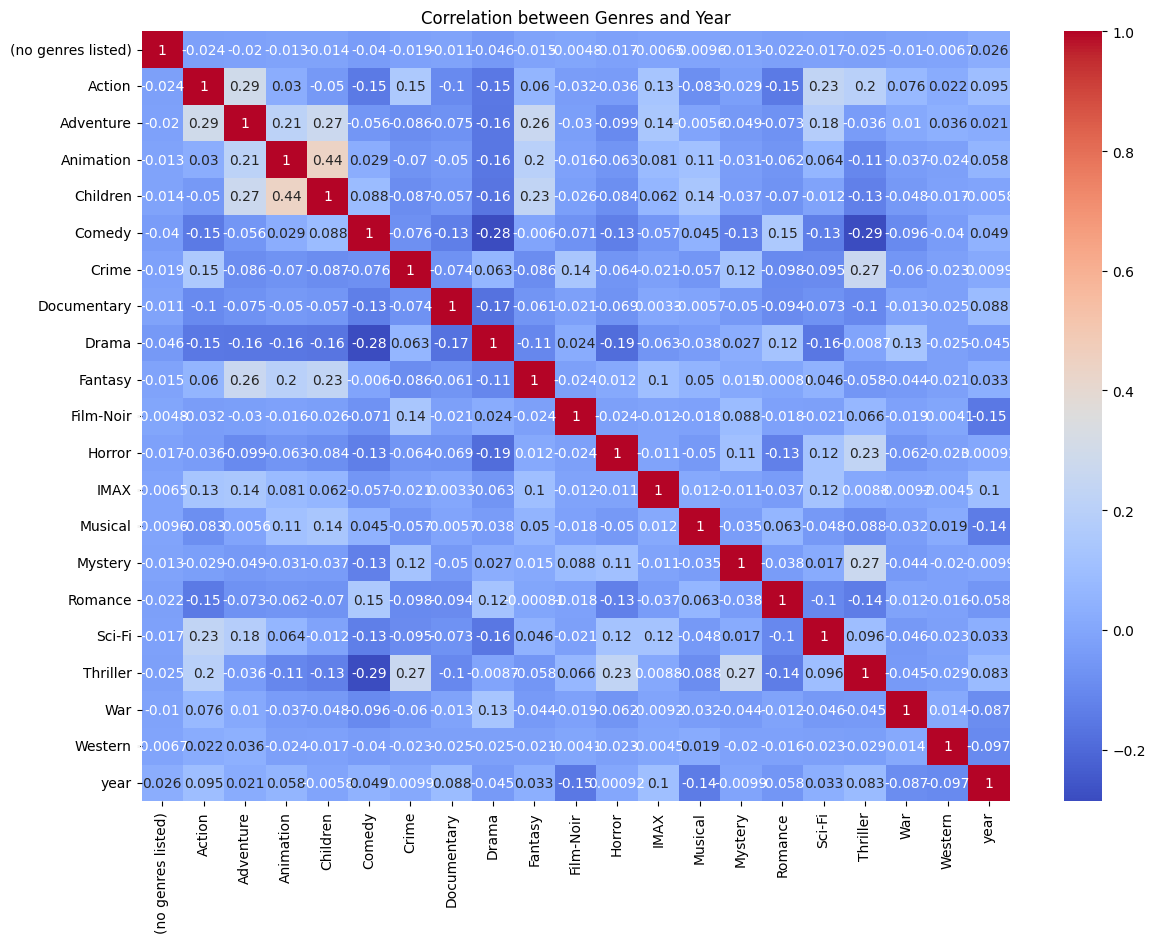

In [33]:

correlation_matrix = movies.drop(columns=['movieId', 'title', 'genres']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Genres and Year')
plt.show()

In [34]:
movies['year'] = movies['year'].dropna().astype(int)
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995


In [35]:
movies.to_csv('cleaned_movies.csv', index=False)